# Principal Components Analysis(PCA) in SaS for the Regions of Greece 

### Team D:

* Klainti Bodurri
* Eleftherios P. Loukas
* Konstantinos Kanellis

## -0- Prepare the .xlsx file correctly for SaS
We did the following 3 actions in the `.xlsx` dataset:

0) Put it under the `/sasuser.v94/` directory

1) We deleted the first column which was a string column (no numeric values)

2) Removed all spaces in the attributes' names

### Quick Note: We applied PCA by defining the regions as the attributes.
### Otherwise, we could transpose the dataset and choose the priorities of the regions as independent variables-attributes(like the lab6 we did last week in the laboratory)


## -1- Define the path of the dataset

In [1]:
filename reffile '/folders/myfolders/sasuser.v94/Lab6_priorities_perifereion.xlsx'; 
/* filename reffile 'Lab6_priorities_perifereion.xlsx'; */

## -2- Import the dataset

In [2]:
proc import datafile=reffile
	dbms=xlsx /* File Extension */
	out=perifereies; /* Export */
	getnames=yes; /* Read variable names from the 1st line */
run;

## -3- Show contents of dataset

In [3]:
proc contents data=perifereies; run;
/* We could use the following code too:

proc print;
    title3 'The data as SaS sees it'; run;
    
*/

## -4- Use corr prodecure to show the correlation between the variables

In [4]:
proc corr nosimple;
var KRITI	ANATOLIKIMAKEDONIATHRAKI	ATTIKI	VOREIOAIGAIO	
	DYTIKIELLADA	DYTIKIMAKEDONIA	IPIROS	THESSALIA	IONIANISIA	
	KENTRIKIMAKEDONIA	NOTIOAIGAIO	PELOPONNISOS	STEREAELLADA;
run;

## -5- PCA ANALYSIS 


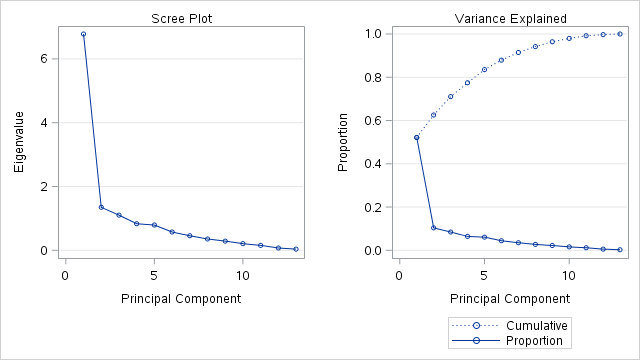

In [9]:
proc princomp data=perifereies out=prin plots(only) = scree;
var KRITI	ANATOLIKIMAKEDONIATHRAKI	ATTIKI	VOREIOAIGAIO	
	DYTIKIELLADA	DYTIKIMAKEDONIA	IPIROS	THESSALIA	IONIANISIA	
	KENTRIKIMAKEDONIA	NOTIOAIGAIO	PELOPONNISOS	STEREAELLADA;
run;

It is interesting to watch the `scree` plot above
We can see the highest eigenvalue which is of PC1, the second highest eigenvalue which is of PC2.
This corresponds to the larger variance in our datasets' components

## -6- Principal Components

In [6]:
proc print data=prin;
var prin1-prin13;
run;

Obs,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6,Prin7,Prin8,Prin9,Prin10,Prin11,Prin12,Prin13
1,2.05898,0.14679,0.03160,0.25643,-0.13110,-0.04861,0.03839,-0.00233,-0.13555,0.01866,-0.01969,0.10222,0.04350
2,0.84788,-0.41690,0.35646,-0.31509,-0.34796,1.79381,-0.89148,0.63004,1.00183,0.66052,-0.15435,0.09827,0.29392
3,0.94027,1.23113,0.63334,-1.36995,-0.68774,0.88946,-0.73577,0.51541,0.38184,-1.59506,0.17300,-0.34745,-0.05311
4,2.05898,0.14679,0.03160,0.25643,-0.13110,-0.04861,0.03839,-0.00233,-0.13555,0.01866,-0.01969,0.10222,0.04350
5,2.05898,0.14679,0.03160,0.25643,-0.13110,-0.04861,0.03839,-0.00233,-0.13555,0.01866,-0.01969,0.10222,0.04350
6,0.90023,-0.50259,0.77168,-0.82761,1.15649,0.53322,-0.09197,1.55488,-0.03850,-0.52638,-0.53779,0.39436,-0.30783
7,0.28782,-1.74133,-1.48256,0.51671,-0.95196,-0.71070,-1.76680,-0.12860,0.88407,0.36131,0.51165,-0.24769,0.06314
8,2.05898,0.14679,0.03160,0.25643,-0.13110,-0.04861,0.03839,-0.00233,-0.13555,0.01866,-0.01969,0.10222,0.04350
9,2.05898,0.14679,0.03160,0.25643,-0.13110,-0.04861,0.03839,-0.00233,-0.13555,0.01866,-0.01969,0.10222,0.04350
10,2.05898,0.14679,0.03160,0.25643,-0.13110,-0.04861,0.03839,-0.00233,-0.13555,0.01866,-0.01969,0.10222,0.04350


## -7- Calculate the mean values of principal components for verification purposes
### Mean values should be zero!


In [7]:
proc means data=prin mean var maxdec=4;
var prin1-prin13;
run;

Variable,Mean,Variance
Prin1 Prin2 Prin3 Prin4 Prin5 Prin6 Prin7 Prin8 Prin9 Prin10 Prin11 Prin12 Prin13,0.0000 -0.0000 0.0000 0.0000 0.0000 -0.0000 -0.0000 -0.0000 0.0000 -0.0000 0.0000 -0.0000 0.0000,6.7811 1.3489 1.1025 0.8336 0.7914 0.5738 0.4569 0.3543 0.2870 0.2077 0.1538 0.0731 0.0359


## -8- Show the correlation between principal components(PCs)
## Since the principal components are uncorrelated, the correlation should be zero!

In [8]:
proc corr data=prin;
var prin1-prin13;
run;